# Jonction PN

## Import and Formatting

The goal of this section is to import all the necessary files and libraries required for the subsequent data analysis.
It also includes setting up the formatting parameters for the plots and visualizations.

## Import

In [1]:
# ============================================================
# Import Required Libraries
# ============================================================

# ------------------------------------------------------------
# Numerical and Plotting Libraries
# ------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Devsim
# ------------------------------------------------------------
from devsim import print_node_values, set_parameter, solve, write_devices
import devsim.python_packages.simple_physics as simple_physics
import diode_common
from devsim import (
    get_node_model_values,
    get_edge_model_values,
    edge_average_model,
)

# ============================================================
# End of Imports
# ============================================================

## Formatting

Adjusting Plotly chart settings for clarity and consistency.

## Objectif

L'objectif de se premier notebook est de faire juste une jonction PN.

L'objectif est de faire une simulation de matériaux semi-conducteur. Or les semi-conducteurs sont des éléments essentiels en électronique, ils sont la base des diodes, des transistors, or avec ces éléments il est possible de faire les ordianteurs, la plupart des composants électroniques. 

Les matériaux semi-conducteurs sont dopés, cela correspond à l'ajout d'impureté en petit quantité dans les semi-conducteurs et cela va modifier les propriétés de conductivité. Il existe deux types de dopage : 

* Le dopage de type **N**, qui consiste à insérer des atomes de type donneur d'électrons afin d'obtenir une plus forte densité d'électrons libres, qui sont négativement chargés.
* Le dopage de type **P**, qui consiste à insérer des atomes de type accepteur d'électrons afin d'obtenir une plus faible densité d'électrons libres, donc un excès de trous, considérés comme positivement chargés.



In [2]:
import diode_common

#####
# dio1
#
# Make doping a step function
# print dat to text file for viewing in grace
# verify currents analytically
# in dio2 add recombination
#

device = "MyDevice"
region = "MyRegion"

diode_common.CreateMesh(device=device, region=region)

diode_common.SetParameters(device=device, region=region)
set_parameter(device=device, region=region, name="taun", value=1e-8)
set_parameter(device=device, region=region, name="taup", value=1e-8)

diode_common.SetNetDoping(device=device, region=region)

print_node_values(device=device, region=region, name="NetDoping")

diode_common.InitialSolution(device, region)

# Initial DC solution
solve(type="dc", absolute_error=1.0, relative_error=1e-10, maximum_iterations=30)

diode_common.DriftDiffusionInitialSolution(device, region)
###
### Drift diffusion simulation at equilibrium
###
solve(type="dc", absolute_error=1e10, relative_error=1e-10, maximum_iterations=30)


####
#### Ramp the bias to 0.5 Volts
####
v = 0.0
while v < 0.51:
    set_parameter(device=device, name=simple_physics.GetContactBiasName("top"), value=v)
    solve(type="dc", absolute_error=1e10, relative_error=1e-10, maximum_iterations=30)
    simple_physics.PrintCurrents(device, "top")
    simple_physics.PrintCurrents(device, "bot")
    v += 0.1

mid
bot
 (region: MyRegion)
 (contact: top)
 (contact: bot)
NetDoping
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.00000e+18
-1.0000

In [3]:
write_devices(file="data/diode_1d.dat", type="tecplot")
write_devices(file="data/diode_1d.msh")
write_devices(
    file="diode_1d.vtk",
    type="vtk",
)

✅ Figures saved: diode_1d_density.png and diode_1d_current.png


<Figure size 700x500 with 0 Axes>

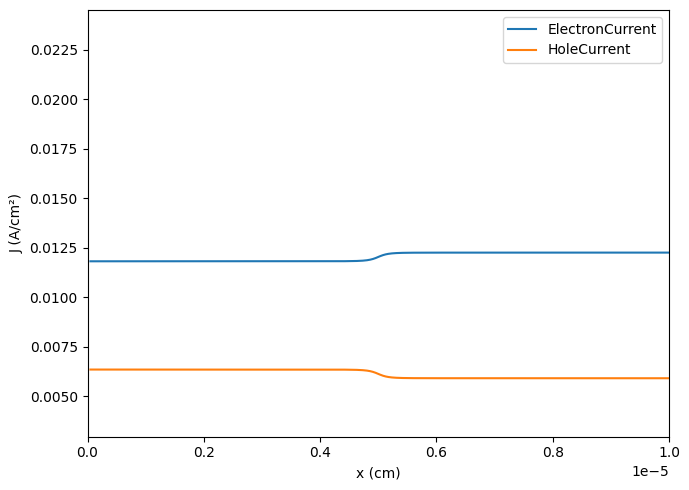

In [4]:
# === Configuration ===
device = "MyDevice"
region = "MyRegion"

# --- Get x positions of nodes ---
x = get_node_model_values(device=device, region=region, name="x")

# === Plot carrier densities ===
fields = ("Electrons", "Holes", "Donors", "Acceptors")

# initialize y-axis limits
ymax = 10
ymin = 10

plt.figure(figsize=(7,5))

for field in fields:
    y = get_node_model_values(device=device, region=region, name=field)
    if max(y) > ymax:
        ymax = max(y)
    plt.semilogy(x, y, label=field)

plt.xlabel('x (cm)')
plt.ylabel('Density (#/cm³)')
plt.legend()
ymax *= 10
plt.axis([min(x), max(x), ymin, ymax])
plt.tight_layout()
plt.savefig("diode_1d_density.png", dpi=300)
plt.clf()  # clear figure for next plot

# === Plot current densities ===
edge_average_model(device=device, region=region, node_model="x", edge_model="xmid")
xmid = get_edge_model_values(device=device, region=region, name="xmid")

efields = ("ElectronCurrent", "HoleCurrent")

# initialize limits
y = get_edge_model_values(device=device, region=region, name="ElectronCurrent")
ymin = min(y)
ymax = max(y)

plt.figure(figsize=(7,5))

for field in efields:
    y = get_edge_model_values(device=device, region=region, name=field)
    ymin = min(ymin, min(y))
    ymax = max(ymax, max(y))
    plt.plot(xmid, y, label=field)

plt.xlabel('x (cm)')
plt.ylabel('J (A/cm²)')
plt.legend()
plt.axis([min(x), max(x), 0.5 * ymin, 2 * ymax])
plt.tight_layout()
plt.savefig("diode_1d_current.png", dpi=300)

print("✅ Figures saved: diode_1d_density.png and diode_1d_current.png")

In [5]:
# Copyright 2013 DEVSIM LLC
#
# SPDX-License-Identifier: Apache-2.0

from devsim import node_model, set_parameter, solve, write_devices

from devsim.python_packages.simple_physics import GetContactBiasName, PrintCurrents
import diode_common

device = "diode2d"
region = "Bulk"

diode_common.Create2DGmshMesh(device, region)

# this is is the devsim format
write_devices(file="gmsh_diode2d_out.msh")

diode_common.SetParameters(device=device, region=region)

####
#### NetDoping
####
node_model(
    device=device, region=region, name="Acceptors", equation="1.0e18*step(0.5e-5-y);"
)
node_model(
    device=device, region=region, name="Donors", equation="1.0e18*step(y-0.5e-5);"
)
node_model(device=device, region=region, name="NetDoping", equation="Donors-Acceptors;")

diode_common.InitialSolution(device, region)


####
#### Initial DC solution
####
solve(type="dc", absolute_error=1.0, relative_error=1e-12, maximum_iterations=30)

###
### Drift diffusion simulation at equilibrium
###
diode_common.DriftDiffusionInitialSolution(device, region)

solve(type="dc", absolute_error=1e10, relative_error=1e-10, maximum_iterations=50)

v = 0.0
while v < 0.51:
    set_parameter(device=device, name=GetContactBiasName("top"), value=v)
    solve(type="dc", absolute_error=1e10, relative_error=1e-10, maximum_iterations=30)
    PrintCurrents(device, "top")
    PrintCurrents(device, "bot")
    v += 0.1

write_devices(file="gmsh_diode2d.dat", type="tecplot")
write_devices(file="gmsh_diode2d_dd.msh", type="devsim")

Physical group name Base has 0 Tetrahedra.
Physical group name Base has 0 Triangles.
Physical group name Base has 19 Lines.
Physical group name Base has 20 Points.
Physical group name Bulk has 0 Tetrahedra.
Physical group name Bulk has 922 Triangles.
Physical group name Bulk has 1422 Lines.
Physical group name Bulk has 501 Points.
Physical group name Emitter has 0 Tetrahedra.
Physical group name Emitter has 0 Triangles.
Physical group name Emitter has 20 Lines.
Physical group name Emitter has 21 Points.
Device diode2d has 501 coordinates with max index 501
Region Bulk has 501 nodes.
Contact bot in region Bulk with 21 nodes
Contact top in region Bulk with 20 nodes
number of equations 1896
Iteration: 0
  Device: "MyDevice"	RelError: 3.60878e-15	AbsError: 4.73327e+02
    Region: "MyRegion"	RelError: 3.60878e-15	AbsError: 4.73327e+02
      Equation: "ElectronContinuityEquation"	RelError: 1.10223e-15	AbsError: 1.59559e+02
      Equation: "HoleContinuityEquation"	RelError: 2.06871e-15	AbsErr

error: Convergence failure!
